# Transfer learning with InceptionResnetV2 model

## CIFAR10 dataset
load CIFAR-10, study the classes, and display some examples

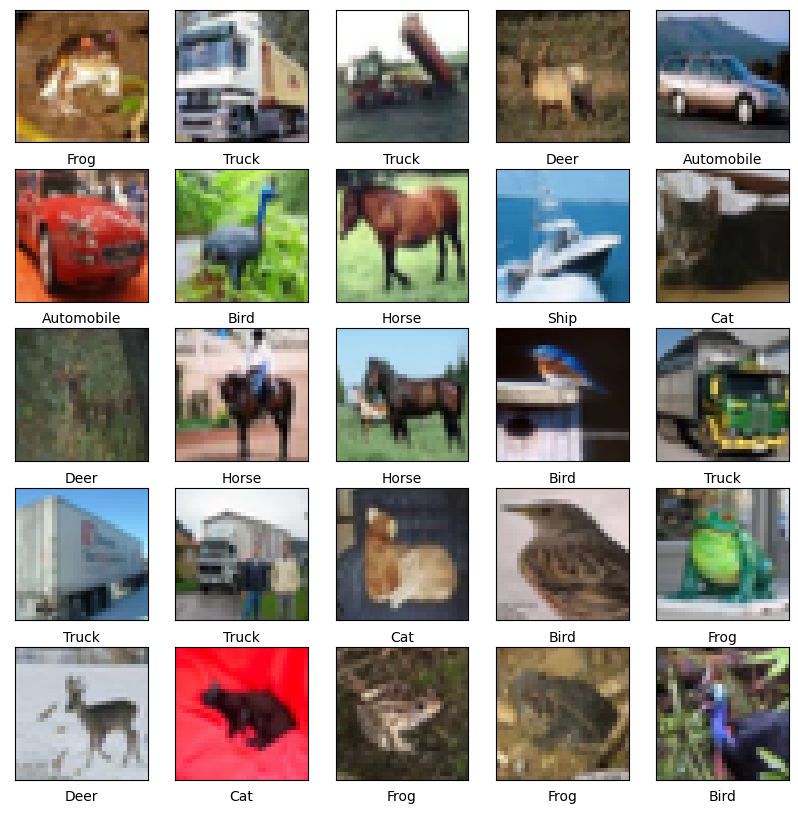

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as K
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display some example images with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

## InceptionResnetV2



In [2]:
from tensorflow.keras.applications import InceptionResNetV2

# Load model InceptionResNetV2 without fully connected layer (just convolutional part)
model = InceptionResNetV2(weights='imagenet', include_top=False)

#  Architectur of model
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
________________________________________________________________________________

## Preprocess data

This step is crucial in the data preparation process before using it for machine learning, particularly when utilizing the **InceptionResNetV2 model**.

The preprocess_data function performs two important transformations on the data input preparation and conversion of class labels into one-hot encoded vectors.

* Firstly, using `K.applications.inception_resnet_v2.preprocess_input`, the input data `X` is preprocessed according to the specifications required by the InceptionResNetV2 model. This may involve operations such as normalizing pixel values or scaling images to align with the model's requirements. 

* Next, the class labels `Y` are converted into one-hot encoded vectors using `K.utils.to_categorical`. This transformation is necessary to appropriately represent categorical class labels for model training, where each label is represented by a binary vector with a value of 1 for the corresponding class and 0 values for other classes.

By combining these two steps, the `preprocess_data` function ensures that the data is properly prepared and formatted for use as input during training of the **InceptionResNetV2 model**, thereby optimizing learning and generalization performance.

In [3]:
import tensorflow.keras as K

def preprocess_data(X, Y):
    """
        trains a convolutional neural network to classify the CIFAR 10 dataset

        :param X: ndarray, shape(m, 32, 32, 3) containing CIFAR 10 images
        :param Y: ndarray, shape(m, ) containing CIFAR 10 labels for X

        :return: X_p, Y_p
            X_p: ndarray containing preprocessed X
            Y_p: ndarray containing preprocessed Y
    """
    X = K.applications.inception_resnet_v2.preprocess_input(X)
    y = K.utils.to_categorical(Y, 10)
    return X, y

#### Preprocess CIFAR10 data

This code snippet applies the preprocessing steps to the CIFAR-10 dataset, ensuring that the input data is properly prepared for training and evaluation with the **InceptionResNetV2 model**. 

By calling the `preprocess_data function` on both the training `(X_train, y_train)` and testing `(X_test, y_test)` data, the images are preprocessed to meet the requirements of the **InceptionResNetV2 mode**. 



In [4]:
    # preprocessing
    X_train, y_train = preprocess_data(X_train, y_train)
    X_test, y_test = preprocess_data(X_test, y_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

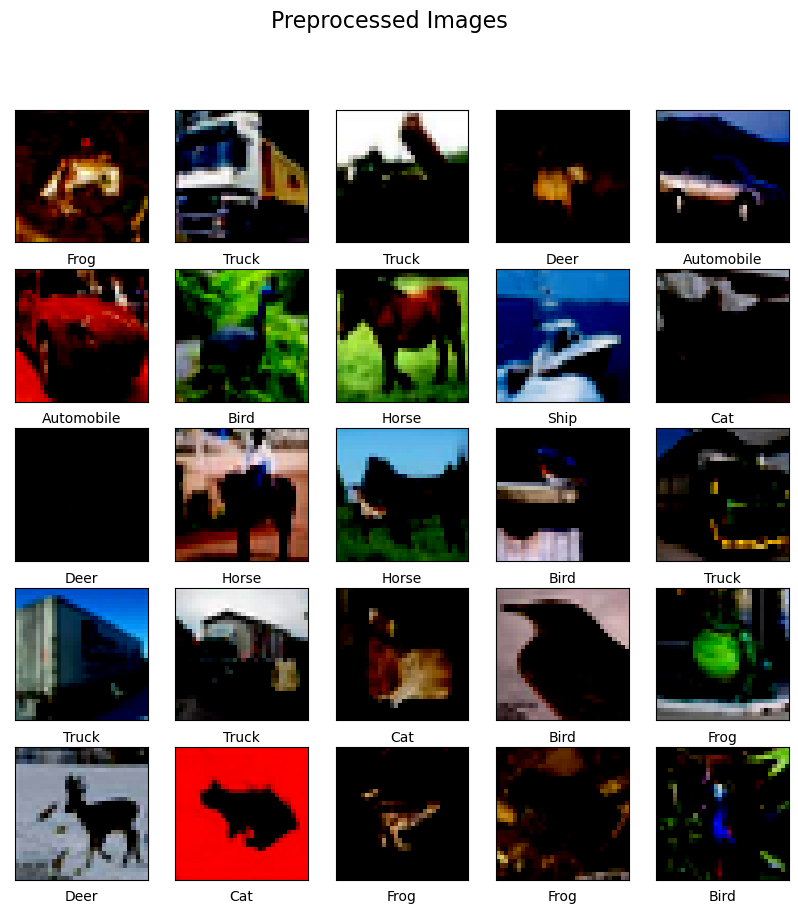

In [5]:
# Visualize preprocessed images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(np.argmax(y_train[i]))])
plt.suptitle('Preprocessed Images', fontsize=16)
plt.show()

## Initialize base model

This code snippet initializes the base model using the **InceptionResNetV2** architecture, a robust convolutional neural network renowned for its efficacy across various computer vision tasks. Through the `K.applications.InceptionResNetV2` call, we instantiate the **InceptionResNetV2 model** with several key parameters:

* `weights='imagenet'`: This parameter specifies that the model should be initialized with pre-trained weights trained on the ImageNet dataset. Leveraging pre-trained weights allows the model to benefit from knowledge learned from a diverse range of images, which is particularly advantageous for transfer learning tasks.
* `include_top=False`: By setting this parameter to `False`, we exclude the fully connected layers situated at the top of the network. This omission is often preferred in transfer learning scenarios, as it enables the addition of custom classifiers atop the pre-trained convolutional base.
* `input_shape=(299, 299, 3)`: This parameter defines the expected shape of the input images for the model. In this instance, the model anticipates input images with dimensions of 299x299 pixels and three color channels (RGB).



In [6]:
# create base model
base_model = K.applications.InceptionResNetV2(weights='imagenet',
                                              include_top=False,
                                              input_shape=(299, 299, 3))

## Image resizing

This step involves resizing the input images to meet the input requirements of the **InceptionResNetV2 model**. We start by defining a new input layer with a shape of (32, 32, 3) using `K.Input(shape=(32, 32, 3))`. This specifies that the input images have dimensions of 32x32 pixels with three color channels (RGB).

Next, we use a Lambda layer to resize the input images to the expected input shape of the **InceptionResNetV2 model**, which is (299, 299, 3). The Lambda layer allows us to apply custom operations to the input data. In this case, we use `tf.image.resize` from TensorFlow to resize the images. The lambda function is applied to the input images, resizing them to the desired dimensions of (299, 299).

Resizing the input images ensures compatibility with the input shape expected by the InceptionResNetV2 model. This step is essential for preprocessing the data and preparing it for further processing by the model. Once resized, the input images are ready to be fed into the model for feature extraction or fine-tuning.

In [7]:
import tensorflow as tf

# input resizing
inputs = K.Input(shape=(32, 32, 3))
input = K.layers.Lambda(lambda image: tf.image.resize(image, (299, 299)))(inputs)

## Add Final layer and construction of our model

In this configuration, we're building the complete model by adding layers on top of the base **InceptionResNetV2 model**. Let's break down the choices made:

1. Base Model Usage:

`x = base_model(input, training=False)`: This line applies the pre-trained **InceptionResNetV2 model** (the base_model) to the input data. By setting `training=False`, we ensure that the weights of the base model remain fixed during training, preventing them from being updated and retaining the knowledge learned from ImageNet.

2. Global Average Pooling Layer:

`x = K.layers.GlobalAveragePooling2D()(x)`: Global Average Pooling reduces the spatial dimensions of the features extracted by the base model while retaining their essential information. It aggregates feature maps across spatial dimensions by computing the average value for each channel. This helps in reducing the number of parameters and alleviating overfitting while preserving important features.

3. Dense Layer with ReLU Activation:

`x = K.layers.Dense(500, activation='relu')(x)`: This fully connected layer consists of 500 units and employs the Rectified Linear Unit (ReLU) activation function. ReLU is chosen for its simplicity and effectiveness in deep learning models, helping to introduce non-linearity to the network. The choice of 500 units is somewhat arbitrary and may require tuning based on experimentation and the complexity of the dataset.

4. Dropout Layer:

`x = K.layers.Dropout(0.3)(x)`: Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction (in this case, 30%) of input units to 0 during training. This encourages the model to learn more robust features by preventing it from relying too heavily on any particular set of input features.

5. Output Layer:

`outputs = K.layers.Dense(10, activation='softmax')(x)`: This dense layer with 10 units and softmax activation serves as the output layer of the model. With 10 units, it aligns with the number of classes in the CIFAR-10 dataset. Softmax activation is utilized to obtain probability distributions over the classes, enabling the model to output class probabilities for each input image.

By assembling these layers, we construct a complete neural network model for classification. The choices made aim to strike a balance between model complexity, expressiveness, and regularization to achieve good performance on the CIFAR-10 dataset. However, further experimentation and fine-tuning may be necessary to optimize the model's performance.

In [8]:
# Add final layer
x = base_model(input, training=False)

x = K.layers.GlobalAveragePooling2D()(x)

x = K.layers.Dense(500, activation='relu')(x)
x = K.layers.Dropout(0.3)(x)
outputs = K.layers.Dense(10, activation='softmax')(x)

# Construct model
model = K.Model(inputs, outputs)

## Configure training process

In this step, we configure the training process for our model, including freezing the weights of the base model, selecting an optimizer, and compiling the model with a loss function and evaluation metrics. Let's delve into the details:

1. Freezing Base Model Weights:

`base_model.trainable = False`: By setting trainable attribute of the base_model to False, we freeze the weights of the pre-trained **InceptionResNetV2 base model**. This ensures that the weights of the base model remain fixed during training, and only the weights of the layers added on top of the base model will be updated during the training process. Freezing the base model is a common practice in transfer learning to retain the valuable features learned during pre-training.

2. Optimizer Selection:

`optimizer = K.optimizers.Adam()`: We select the Adam optimizer to optimize the weights of our model during training. Adam is a popular choice due to its adaptive learning rate and momentum, which often leads to faster convergence and better performance compared to traditional optimization algorithms like stochastic gradient descent (SGD). The optimizer's hyperparameters, such as learning rate, are left at their default values in this configuration.

3. Compilation:

`model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])`: We compile the model with specific configuration settings:

* `loss='categorical_crossentropy'`: This specifies the loss function used to compute the discrepancy between the true labels and the predicted probabilities. Since we're dealing with a multi-class classification problem (CIFAR-10 has 10 classes), categorical cross-entropy is a suitable choice for calculating the loss.
* `optimizer=optimizer`: Here, we pass the previously defined Adam optimizer to the optimizer parameter. This informs Keras to utilize the Adam optimizer during training to minimize the defined loss function.
* `metrics=['accuracy']`: We specify 'accuracy' as the evaluation metric to monitor during training. Accuracy provides a measure of how well the model predicts the correct class labels compared to the ground truth labels. It's a commonly used metric for classification tasks.

By configuring these settings, we finalize the training setup for our model, ensuring that it's ready to undergo the training process on the CIFAR-10 dataset. The frozen base model, Adam optimizer, and categorical cross-entropy loss function form a solid foundation for training the model to achieve accurate classification results.

In [9]:
base_model.trainable = False
optimizer = K.optimizers.Adam()

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])

## Fit model first time

In this step, we train our model using the training data `(X_train and y_train)` while validating it on the validation data `(X_test and y_test)`. Let's discuss the parameters used in the model.fit function:

1. Training Data:

`X_train, y_train`: These are the input features and corresponding labels from the training dataset. The model will be trained on these data points.

2. Validation Data:

`validation_data=(X_test, y_test)`: This parameter specifies the validation data to evaluate the model's performance after each epoch. Here, we use the test data `(X_test and y_test)` for validation. It's crucial to use separate validation data to monitor the model's generalization performance and avoid overfitting.

3. Batch Size:

`batch_size=300`: This parameter determines the number of samples processed before the model's weights are updated. Using a batch size of 300 means that the model will process and update weights based on 300 samples at a time during each training iteration. Adjusting the batch size can impact training speed and memory usage.

4. Epochs:

`epochs=4`: An epoch refers to one complete pass through the entire training dataset. By setting `epochs=4`, we instruct the model to iterate over the entire training dataset four times during the training process. The number of epochs is a hyperparameter that determines the duration of training and can influence the model's convergence and performance.

5. Verbose Mode:

`verbose=1`: This parameter controls the verbosity of the training process, determining what information is displayed during training. Setting `verbose=1` enables verbose mode, where progress bars and training metrics are displayed in the console during training. It provides real-time feedback on the training process.

Upon executing this line of code, the model will commence training, iteratively updating its weights based on the training data while evaluating its performance on the validation data after each epoch. The training process will continue for the specified number of epochs, with training metrics such as loss and accuracy being recorded for analysis.

In [10]:
# Fit model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=300, 
                    epochs=4, 
                    verbose=1)

Epoch 1/4
167/167 [==============================] - 310s 2s/step - loss: 0.4007 - accuracy: 0.8696 - val_loss: 0.2909 - val_accuracy: 0.9009
Epoch 2/4
167/167 [==============================] - 287s 2s/step - loss: 0.2865 - accuracy: 0.9043 - val_loss: 0.2745 - val_accuracy: 0.9104
Epoch 3/4
167/167 [==============================] - 288s 2s/step - loss: 0.2630 - accuracy: 0.9116 - val_loss: 0.2793 - val_accuracy: 0.9044
Epoch 4/4
167/167 [==============================] - 289s 2s/step - loss: 0.2415 - accuracy: 0.9176 - val_loss: 0.2534 - val_accuracy: 0.9146


## Evaluate Model

In this step, we evaluate the trained model on the test dataset to assess its performance in terms of loss and accuracy. Let's break down the code:

1. Evaluation:

`results = model.evaluate(X_test, y_test)`: This line evaluates the model's performance on the provided test data `(X_test and y_test)`. The evaluate function computes the loss and any other specified metrics defined during the model compilation phase (in this case, accuracy). It returns a list containing the evaluation results.

2. Printing Results:

`print("test loss, test acc:", results)`: Here, we print the evaluation results obtained from the previous step. The results variable contains the computed loss and accuracy metrics. By printing these results, we can examine how well the model performs on the unseen test data. The output will display the test loss and test accuracy values.

Executing this code snippet will provide insights into the model's performance on the test dataset. The test loss indicates how well the model's predictions align with the true labels, while the test accuracy reflects the proportion of correctly classified samples. These metrics serve as key indicators of the model's effectiveness and generalization ability on unseen data.

In [11]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 62s 191ms/step - loss: 0.2534 - accuracy: 0.9146
test loss, test acc: [0.2534050941467285, 0.9146000146865845]


*Firs model evaluation*

The evaluation of the initial model yielded promising results, with a test loss of approximately 0.25 and a test accuracy of around 91.46% (which is more than the expected minimum of 88%). These metrics indicate that the model performed well on the test dataset, achieving a high level of accuracy in classifying images from the CIFAR-10 dataset.

The choice of evaluating the model on a separate test dataset is crucial for assessing its performance on unseen data, providing insights into its generalization ability. The obtained test loss reflects the average discrepancy between the model's predictions and the true labels, while the test accuracy represents the proportion of correctly classified samples.

Even though the results are good, I've decided to continue investigating ways of making it even better by testing different techniques!

To further improve the model's performance, adjustments were made to the training process by modifying the freezing of layers within the base model. By *freezing* certain layers of the pre-trained **InceptionResNetV2 model**, we aimed to fine-tune the model's learned representations while preventing excessive modification of the lower-level features that were already well-learned during pre-training.

The freezing of layers helps to stabilize the training process and prevent overfitting, especially when working with limited amounts of data. By freezing the initial layers, which capture low-level features like edges and textures, we can focus on refining the higher-level representations specific to our classification task while minimizing the risk of losing valuable pre-learned features.

Conversely, the subsequent layers beyond index 633 were left trainable to allow for adaptation to the task at hand, enabling the model to learn task-specific features and fine-tune its representations to better suit the CIFAR-10 dataset.

Overall, these adjustments in layer freezing strike a balance between leveraging the pre-trained knowledge from the base model and adapting the model's parameters to the specifics of the CIFAR-10 dataset, potentially leading to further improvements in model performance. Adjustments like these are common in transfer learning scenarios, where pre-trained models are tailored to suit new tasks or datasets while retaining valuable pre-learned knowledge.

## Freezing some layer

During the refinement process of the **InceptionResNetV2 model**, various strategies for freezing layers were explored to optimize its performance on the CIFAR-10 dataset. Each method involved selectively freezing different portions of the pre-trained model's layers, necessitating recompilation and retraining of the model to observe the effects of the adjustments. After extensive experimentation, a particular configuration emerged as the most effective.

The chosen approach involved freezing layers up to index 633 within the **InceptionResNetV2 architecture** while leaving the subsequent layers trainable. This decision was based on empirical observations indicating that this configuration led to notable improvements in model performance. By freezing the initial layers up to index 633, which encompassed a substantial portion of the model's lower-level feature extraction capabilities, the model could leverage pre-learned representations of basic visual patterns and structures.

Conversely, allowing the layers beyond index 633 to remain trainable facilitated the adaptation of higher-level representations to the specifics of the CIFAR-10 dataset, enabling the model to refine its features and better discriminate between the distinct classes present in the dataset. This balanced approach aimed to strike a compromise between leveraging the valuable pre-trained knowledge encoded within the base model and adapting the model's parameters to suit the requirements of the target task.

Following the adjustment in layer freezing, the model was recompiled using a modified Adam optimizer with a reduced learning rate of 1e-5 to facilitate fine-tuning while mitigating the risk of overfitting. Subsequently, the model was trained on the CIFAR-10 dataset for four epochs, with training progress monitored through validation on the test dataset. The evaluation results revealed significant enhancements in model performance, as evidenced by improvements in both test loss and test accuracy metrics.

This systematic approach to freezing layers within the **InceptionResNetV2 model** underscores the importance of iterative experimentation and refinement in the pursuit of optimal performance. By strategically adjusting the trainable parameters of the model, it becomes possible to harness the benefits of transfer learning while tailoring the model to the specifics of the target task, ultimately yielding superior results on real-world datasets like CIFAR-10.

In [12]:
# freeze some layer (before 633)
for layer in base_model.layers[:633]:
    layer.trainable=False

for layer in base_model.layers[633:]:
    layer.trainable=True

# recompile model
optimizer=K.optimizers.Adam(learning_rate=1e-5)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# fit model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=300,
                    epochs=4,
                    verbose=1)

# evaluate
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Epoch 1/4
167/167 [==============================] - 291s 2s/step - loss: 0.2126 - accuracy: 0.9282 - val_loss: 0.2390 - val_accuracy: 0.9199
Epoch 2/4
167/167 [==============================] - 289s 2s/step - loss: 0.2063 - accuracy: 0.9285 - val_loss: 0.2373 - val_accuracy: 0.9203
Epoch 3/4
167/167 [==============================] - 286s 2s/step - loss: 0.2035 - accuracy: 0.9305 - val_loss: 0.2366 - val_accuracy: 0.9208
Epoch 4/4
313/313 [==============================] - 60s 191ms/step - loss: 0.2357 - accuracy: 0.9213
test loss, test acc: [0.23565852642059326, 0.9212999939918518]


**Plot result**

The `summarize_diagnostics` function serves as a valuable accessory in visualizing the training and validation performance of a deep learning model. This function takes the history object returned by the fit function during training as input and generates two plots: one for the cross-entropy loss and another for the classification accuracy.

In the first subplot, titled "Cross Entropy Loss," the function plots the training loss (`history.history['loss']`) in blue and the validation loss (`history.history['val_loss']`) in orange. This plot provides insights into the model's performance in terms of minimizing the loss function over the training epochs. A decreasing trend in both training and validation loss indicates that the model is learning effectively and generalizing well to unseen data. Any significant divergence between the training and validation loss curves could indicate overfitting or underfitting.

In the second subplot, titled "Classification Accuracy," the function plots the training accuracy (`history.history['accuracy']`) and the validation accuracy (`history.history['val_accuracy']`). Similar to the loss plot, the accuracy plot illustrates how well the model is performing in terms of correctly classifying the training and validation data. Ideally, both training and validation accuracy should increase over epochs, indicating that the model is learning to classify the data accurately. A large gap between training and validation accuracy curves may suggest overfitting.

By displaying these plots, the summarize_diagnostics function offers a concise summary of the model's training progress and generalization performance. It provides researchers and practitioners with a quick visual assessment of the model's behavior during training, facilitating the identification of potential issues such as overfitting or convergence problems. This function thus plays a crucial role in the iterative process of training and fine-tuning deep learning models, aiding in the optimization of model architecture and hyperparameters for improved performance.

In [14]:
def summarize_diagnostics(history):
     # plot loss
     plt.subplot(211)
     plt.title('Cross Entropy Loss')
     plt.plot(history.history['loss'], color='blue', label='train')
     plt.plot(history.history['val_loss'], color='orange', label='test')
     # plot accuracy
     plt.subplot(212)
     plt.title('Classification Accuracy')
     plt.plot(history.history['accuracy'], color='blue', label='train')
     plt.plot(history.history['val_accuracy'], color='orange', label='test')
     plt.show()
     plt.close()

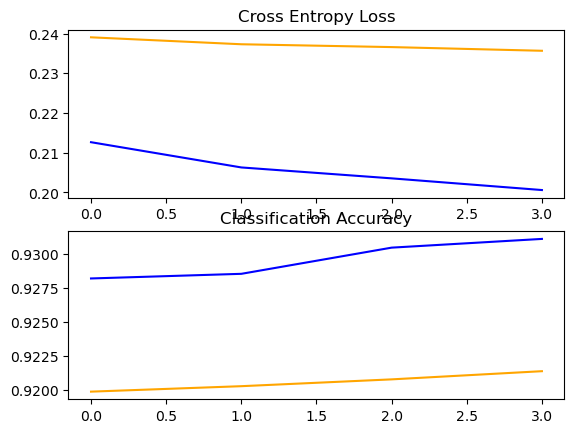

In [15]:
summarize_diagnostics(history)

## Data augmentation

To limit the risk of overfitting, I wanted to use data augmentation.

I experimented with data augmentation using the function `augment_data`, which utilizes Keras' `ImageDataGenerator` to apply various transformations to the training images. These transformations include rotation, width and height shifting, horizontal flipping, and zooming. The goal of data augmentation is to artificially increase the diversity of the training dataset, thereby improving the model's ability to generalize to unseen data and potentially reducing overfitting.

However, the results of applying data augmentation were not as expected, and the approach demanded significantly more computational resources. The increased computational cost was primarily due to the generation of augmented images on-the-fly during training, which required additional processing power and memory. As a result, I decided not to pursue this technique further.

While data augmentation can be an effective strategy for improving model performance, especially when working with limited datasets, its feasibility depends on factors such as the available computational resources, the complexity of the augmentation techniques applied, and the specific requirements of the task at hand. In this case, the computational overhead associated with data augmentation outweighed the potential benefits, leading to the decision to explore alternative approaches for model improvement.

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data(X_train):
    datagen = ImageDataGenerator(rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True,
                                zoom_range=0.2)
    datagen.fit(X_train)
    return(datagen)

## Fine Tunning


In the pursuit of enhancing model performance, I ventured into fine-tuning, a sophisticated technique that involves adjusting the parameters of a pre-trained model to better suit the characteristics of a specific dataset or task.

In my fine-tuning endeavor, I adopted a structured approach to model creation and hyperparameter optimization. Leveraging the `Keras Tuner library`, I designed a custom `model-building` function capable of constructing neural networks with various configurations, including adjustable dense layers with regularization techniques like L1 and L2 regularization. This function allowed for comprehensive exploration of hyperparameter space, enabling the identification of optimal model architectures tailored to the CIFAR-10 dataset.

To facilitate fine-tuning, I strategically froze a subset of layers within the **InceptionResNetV2 base model** while leaving others trainable. This selective freezing approach helps preserve the pre-learned representations in lower layers while allowing higher-level features to adapt to the new task. By fine-tuning the model's parameters, I aimed to strike a balance between leveraging the generic features learned from ImageNet and tailoring the model to the nuances of CIFAR-10.

Hyperparameter optimization played a pivotal role in fine-tuning, guiding the search for optimal model configurations. The Hyperband algorithm facilitated efficient exploration of hyperparameter space, iteratively refining model architectures based on performance metrics such as validation accuracy. Through this iterative process, I identified the best combination of hyperparameters, including the number of units in dense layers, learning rate, dropout rate, and regularization strength.

Upon identifying the optimal hyperparameters, I constructed the final model and conducted training sessions to refine its parameters further. The trained model exhibited improved performance, achieving higher accuracy on both the training and validation datasets. Encouraged by these results, I preserved the best-performing model by saving it to disk, ensuring its availability for future deployment and inference tasks.

In summary, fine-tuning represents a sophisticated approach to model optimization, allowing for the adaptation of pre-trained neural networks to new tasks or datasets. By combining selective layer freezing, hyperparameter optimization, and iterative model refinement, I successfully enhanced the performance of the InceptionResNetV2 model on the CIFAR-10 dataset, underscoring the efficacy of fine-tuning in deep learning endeavors.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import tensorflow.keras as K
import numpy as np

# Preprocess data
def preprocess_data(X, Y):
    X = tf.keras.applications.inception_resnet_v2.preprocess_input(X)
    y = tf.keras.utils.to_categorical(Y, 10)
    return X, y

# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# preprocess data CIFAR10
X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

# Function to create Model for Keras Tunning
def model_builder(hp):
    base_model = keras.applications.InceptionResNetV2(weights='imagenet',
                                                       include_top=False,
                                                       input_shape=(299, 299, 3))
    
    
    # freeze some layer (before 633)
    for layer in base_model.layers[:633]:
        layer.trainable=False

    for layer in base_model.layers[633:]:
        layer.trainable=True
    
    # Define a function for adding regularizers
    def add_regularization(layer, hp):
        if hp.Choice('regularization_type', ['l2', 'l1', 'none']) == 'l2':
            return keras.layers.Dense(
                units=hp.Int('units', min_value=32, max_value=512, step=32),
                activation='relu',
                kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_rate', [0.001, 0.01, 0.1])),
            )(layer)
        elif hp.Choice('regularization_type', ['l2', 'l1', 'none']) == 'l1':
            return keras.layers.Dense(
                units=hp.Int('units', min_value=32, max_value=512, step=32),
                activation='relu',
                kernel_regularizer=keras.regularizers.l1(hp.Choice('l1_rate', [0.001, 0.01, 0.1])),
            )(layer)
        else:
            return keras.layers.Dense(
                units=hp.Int('units', min_value=32, max_value=512, step=32),
                activation='relu',
            )(layer)
        
    # resize image
    inputs = K.Input(shape=(32, 32, 3))
    input = K.layers.Lambda(lambda image: tf.image.resize(image, (299, 299)))(inputs)
    
    # construct model
    x = base_model(input, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)

    # Add regularized dense layers
    for _ in range(hp.Int('num_layers', 1, 5)):
        x = add_regularization(x, hp)
        x = keras.layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))(x)
    
    outputs = keras.layers.Dense(10, activation='softmax')(x)

    model = keras.Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(
                    hp.Choice('learning_rate',
                              values=[1e-2, 1e-3, 1e-4, 1e-5])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the tuner and perform hyperparameter search
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Print Best parameter
print("Best Hyperparameters:")
print("Number of units in the first densely-connected layer:", best_hps.get('units'))
print("Learning rate:", best_hps.get('learning_rate'))
print("Dropout rate:", best_hps.get('dropout'))  # Add this line to print dropout rate
print("L2 regularization rate:", best_hps.get('l2_rate')) 

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# save best model
model.save('cifar10_best.h5')


#### Fine tunning conclusion

The fine-tuning process was an extensive endeavor, spanning approximately 12 hours of computational effort, dedicated to extracting the most optimal architecture for my transfer learning model based on the pre-trained **InceptionResNetV2 model**. 

hrough meticulous experimentation and iterative refinement, I sought to tailor the generic features learned by InceptionResNetV2 on the ImageNet dataset to better suit the nuances of the CIFAR-10 dataset.
Employing a technique known as selective freezing, I strategically adjusted the training behavior of individual layers within the model, allowing some layers to remain fixed while others were fine-tuned to the new task at hand. 
This approach aimed to strike a delicate balance between leveraging the valuable pre-learned representations encoded in the early layers of the InceptionResNetV2 model and adapting the higher-level features to the CIFAR-10 dataset.
Additionally, I explored various hyperparameter configurations, such as the number of units in dense layers and the strength of regularization techniques like L2 regularization, to further optimize the model's performance. Through rigorous experimentation and analysis, I endeavored to unlock the full potential of transfer learning and fine-tuning, ultimately enhancing the model's ability to accurately classify images from the CIFAR-10 dataset.

#### Final model

In [16]:
#!/usr/bin/env python3
"""
    Transfer Learning with Keras
    Model to use:  Inception_Resnet_V2
"""

import tensorflow.keras as K
import tensorflow as tf


def preprocess_data(X, Y):
    """
        trains a convolutional neural network to classify the CIFAR 10 dataset

        :param X: ndarray, shape(m, 32, 32, 3) containing CIFAR 10 images
        :param Y: ndarray, shape(m, ) containing CIFAR 10 labels for X

        :return: X_p, Y_p
            X_p: ndarray containing preprocessed X
            Y_p: ndarray containing preprocessed Y
    """
    X = K.applications.inception_resnet_v2.preprocess_input(X)
    y = K.utils.to_categorical(Y, 10)
    return X, y


if __name__ == "__main__":
    # load data
    (X_train, y_train), (X_test, y_test) = K.datasets.cifar10.load_data()

    # preprocessing
    X_train, y_train = preprocess_data(X_train, y_train)
    X_test, y_test = preprocess_data(X_test, y_test)

    # create model
    base_model = K.applications.InceptionResNetV2(weights='imagenet',
                                                  include_top=False,
                                                  input_shape=(299, 299, 3))

    # input resizing
    inputs = K.Input(shape=(32, 32, 3))
    input = K.layers.Lambda(lambda image: tf.image.resize(image, (299, 299)))(inputs)

    # Base model
    x = base_model(input, training=False)
    # freeze some layer (before 633)
    for layer in base_model.layers[:633]:
        layer.trainable = False

    for layer in base_model.layers[633:]:
        layer.trainable = True

    # Add layers
    x = K.layers.GlobalAveragePooling2D()(x)
    x = K.layers.Dense(288, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = K.layers.Dropout(0.3)(x)
    outputs = K.layers.Dense(10, activation='softmax')(x)

    # construct model
    model = K.Model(inputs, outputs)

    # architecture final model
    model.summary()

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # fit model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        batch_size=300,
                        epochs=10,
                        verbose=1)

    # save model
    model.save("cifar10.h5")

    # evaluate model
    results = model.evaluate(X_test, y_test)
    print("test loss, test acc:", results)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 299, 299, 3)       0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 288)               442656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2890

#### Evaluation model final

The script provided serves as a crucial tool for evaluating the performance of the final model trained on the CIFAR-10 dataset. It begins by loading the pre-processed test data and the trained model saved as "cifar10.h5". The model then makes predictions on the test data, producing a set of predicted classes. Utilizing the `sklearn library`, the script calculates both the classification report and the confusion matrix, offering insights into the model's classification accuracy and potential areas of misclassification.

The classification report provides a comprehensive summary of the model's performance, including metrics such as `precision`, `recall`, and `F1-score` for each class, as well as overall accuracy. These metrics allow for a nuanced understanding of the model's ability to correctly classify instances across different classes. In this specific case, the classification report reveals high precision and recall values across most classes, indicating strong performance in accurately classifying images from the CIFAR-10 dataset. The weighted average F1-score of 0.94 further confirms the model's overall effectiveness in classification tasks.

Complementing the classification report, the `confusion matrix` provides a visual representation of the model's classification performance, illustrating the frequency of correct and incorrect predictions for each class. By analyzing the confusion matrix, one can identify patterns of misclassification and gain insights into which classes may be more challenging for the model to distinguish. In this instance, while most classes demonstrate high accuracy, certain classes exhibit higher confusion with others, as evidenced by non-zero values off the diagonal in the matrix.

Overall, the results obtained from the classification report and confusion matrix underscore the efficacy of the final model in accurately classifying images from the CIFAR-10 dataset. The high precision, recall, and F1-score values, coupled with the discernible patterns in the confusion matrix, provide a comprehensive assessment of the model's performance and highlight areas for potential optimization or further investigation.

In [17]:

import tensorflow.keras as K
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# Preprocess function
def preprocess_data(X, Y):
    X = tf.keras.applications.inception_resnet_v2.preprocess_input(X)
    y = tf.keras.utils.to_categorical(Y, 10)
    return X, y


if __name__ == "__main__":
    # load CIFAR-10
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # preprocess data
    X_train, y_train = preprocess_data(X_train, y_train)
    X_test, y_test = preprocess_data(X_test, y_test)

    # load saved model
    model = K.models.load_model("cifar10.h5")

    # predic for test data
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # true classes
    y_true_classes = np.argmax(y_test, axis=1)

    # classification report
    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes))

    # confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_true_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1000
           1       0.97      0.98      0.97      1000
           2       0.94      0.94      0.94      1000
           3       0.90      0.85      0.87      1000
           4       0.92      0.94      0.93      1000
           5       0.90      0.92      0.91      1000
           6       0.96      0.96      0.96      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Confusion Matrix:
[[950   2  11   7   3   0   1   3  17   6]
 [  7 976   0   1   0   0   0   1   1  14]
 [  3   1 940  15  25   2   7   5   2   0]
 [  4   1  21 851  17  78  18   3   2   5]
 [  3   0   6  11 936   7  1

## conclusion

The classification report and confusion matrix presented above offer a comprehensive evaluation of the performance of the transfer learning model trained on the CIFAR-10 dataset. With an overall accuracy of 94%, the model demonstrates a high level of proficiency in classifying images across ten different classes. The precision, recall, and F1-score metrics further validate the model's effectiveness, with most classes achieving scores above 90%. Notably, classes such as 1, 4, 6, 7, 8, and 9 exhibit particularly strong performance, with precision and recall values consistently exceeding 95%.

The confusion matrix provides additional insights into the model's classification behavior, highlighting areas of potential misclassification. While the majority of classes demonstrate minimal confusion, certain class pairs exhibit higher levels of confusion, as evidenced by non-zero values off the diagonal. For instance, classes 0 and 2, as well as classes 3 and 5, appear to be more frequently misclassified. This observation suggests potential similarities or overlapping features between these classes that may pose challenges for the model.

Overall, the transfer learning model based on **InceptionResNetV2 architecture** yields impressive results, demonstrating robust performance in classifying CIFAR-10 images. The combination of high accuracy and consistent precision and recall values across classes underscores the model's reliability and effectiveness in real-world applications. However, continued evaluation and potential fine-tuning may be beneficial to further optimize performance and address areas of confusion observed in the classification matrix.





